In [119]:
import scipy.io
import matplotlib.pyplot as plt
import matplotlib
%matplotlib notebook
import ast
import numpy as np
from scipy.ndimage import gaussian_filter1d
from scipy.signal import argrelextrema
import pandas as pd

In [26]:
df = pd.read_csv('../paper_data/zzz/zzz00.csv', skiprows = 6,usecols=[1,3,6,9,12])
# Y,Y.1,Y.2,Y.3
# UR5,fin mid, fin tip, key
# df['diff_ur_fin'] = df['Y']-df['Y.1']
# df['diff_ur_fin_filtered'] = gaussian_filter1d(df['diff_ur_fin'], sigma=2, truncate=4)

<IPython.core.display.Javascript object>


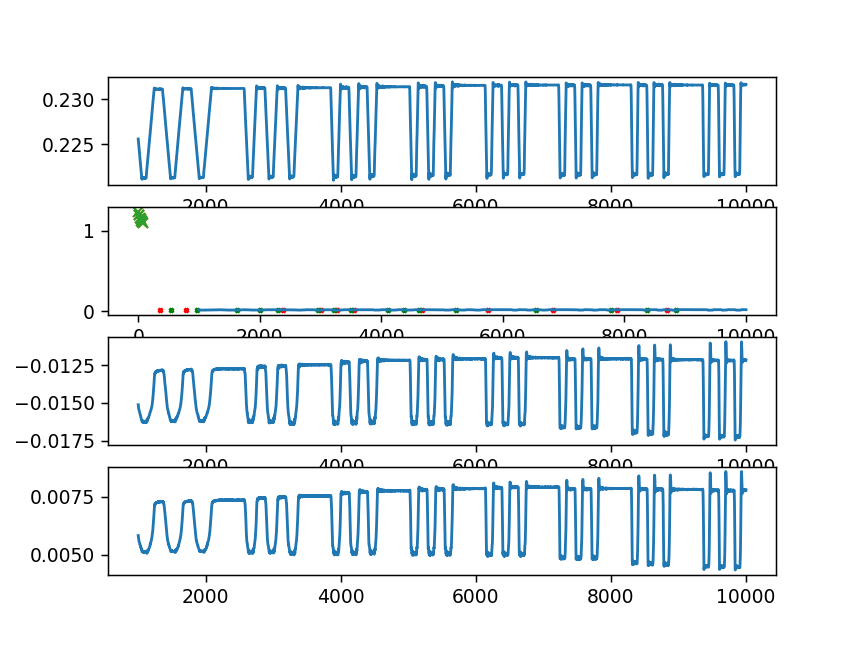

In [52]:
start = 1000
end = 10000

name = ['Y','Y.1','Y.2','Y.3']
for n in name:
#     df[n+'f'] = gaussian_filter1d(df[n], sigma=1, truncate=6)
    df[n+'f'] = df[n]
plt.subplot(4,1,1)
plt.plot(df['Y'][start:end])
plt.subplot(4,1,2)
plt.plot(df['Y.1'][start:end])
plt.subplot(4,1,3)
plt.plot(df['Y.2'][start:end])
plt.subplot(4,1,4)
plt.plot(df['Y.3'][start:end])

plt.show()

In [53]:
# ratio = fingermid Y.1/fingertip Y.2

# x = np.random.random(12)

n = 250

# for local maxima
maxpoints = argrelextrema(df['Y.1f'][start:end].values, np.greater,order=n)
maxvalues = []
for m in maxpoints:
    maxvalues.append(df['Y.1'][m])
plt.subplot(4,1,2)
plt.scatter(maxpoints,maxvalues,marker = 'x', c = 'red',s=5)
# for local minima
# argrelextrema(df['Y.1'], np.less)

In [54]:
minpoints = argrelextrema(df['Y.1f'][start:end].values, np.less,order=n)
minvalues = []
for m in minpoints:
    minvalues.append(df['Y.1'][m])
plt.subplot(4,1,2)
plt.scatter(minpoints,minvalues,marker = 'x', c = 'green',s=5)

In [70]:
list(range(6,69,7))

[6, 13, 20, 27, 34, 41, 48, 55, 62]

In [80]:
# cols = list(range(6,69,7))
# # df = pd.read_csv('../paper_data/ratio.csv', skiprows = 1,usecols=cols)

# print(df['0'])

0    1.284061
1    1.295844
2    1.286041
3    1.299041
Name: 0, dtype: float64


<IPython.core.display.Javascript object>


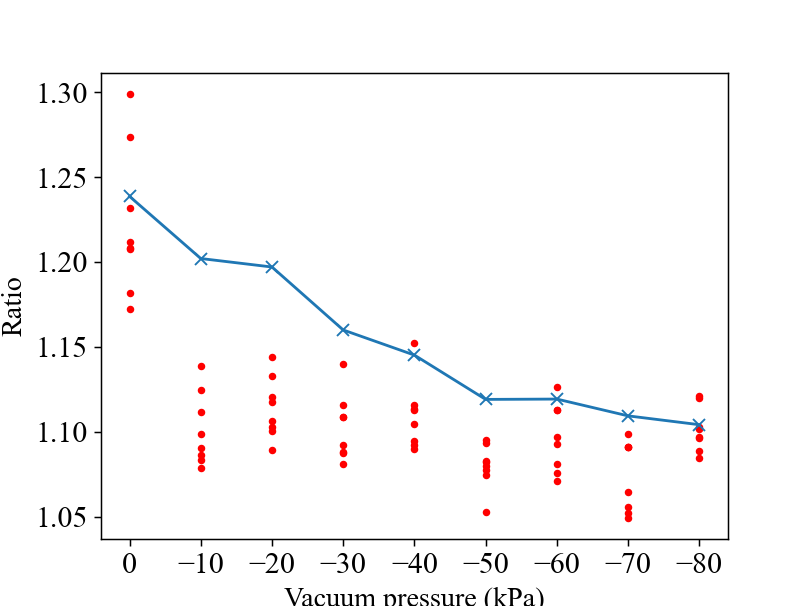

In [93]:
df = pd.read_csv('../paper_data/ratio.csv', skiprows = 1)

# ratio = [1.291217926, 1.144419883, 1.142418695,1.160882627,1.146357285,1.098995832,1.123150131,1.089236347 ,1.12424185];
ratio_avg = []
ratio_ref = [1.2386, 1.2020, 1.1970,1.1599,1.1451,1.1190,1.1192,1.1093,1.1041];
pressure_list = list(range(0,-90,-10))
name_list = [str(e) for e in list(range(0,90,10))]
ratio_points_x = []
ratio_points_y = []

for n in name_list:
    ratio_avg.append(df[n].mean())
    for e in df[n]:
        ratio_points_x.append(-int(n))
        ratio_points_y.append(e)
 
# plotting our function and
# error bar
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams.update({'font.size': 16})

fig = plt.figure(2,figsize=(6, 4.5))
# ax2 = ax1.twinx() 
# ax2.set_ylabel('Error rate (%)') 
ax2.bar(range(len(data)), data, color='royalblue', alpha=0.7)
plt.plot(pressure_list, ratio_ref, marker = 'x')
plt.scatter(ratio_points_x,ratio_points_y, marker = '.',color='red')

plt.xlabel('Vacuum pressure (kPa)',fontsize=15)
plt.ylabel('Ratio',fontsize=15)
# $\frac{x_1}{x_2}$
# plt.xticks([element * (-1) for element in pressure_list][::])
plt.xticks(pressure_list)
plt.gca().invert_xaxis()
# plt.grid(linestyle = '--', linewidth = 0.5)
plt.show()
 
# plt.errorbar(x, y, yerr = y_error, fmt ='o')

<IPython.core.display.Javascript object>


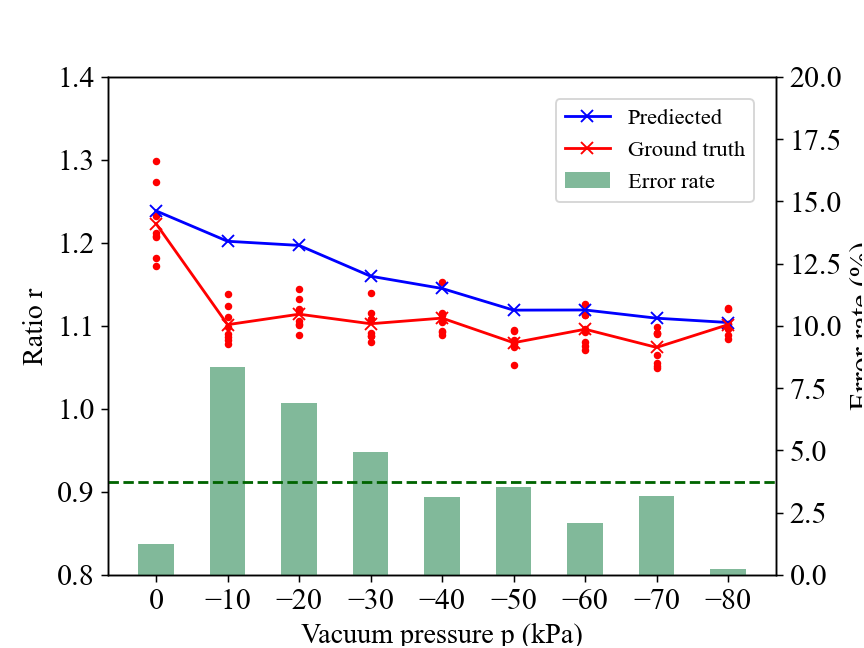

In [164]:
df = pd.read_csv('../paper_data/ratio.csv', skiprows = 1)

# ratio = [1.291217926, 1.144419883, 1.142418695,1.160882627,1.146357285,1.098995832,1.123150131,1.089236347 ,1.12424185];
ratio_avg = []
ratio_ref = [1.2386, 1.2020, 1.1970,1.1599,1.1451,1.1190,1.1192,1.1093,1.1041];
pressure_list = list(range(0,-90,-10))
name_list = [str(e) for e in list(range(0,90,10))]
ratio_points_x = []
ratio_points_y = []

for n in name_list:
    ratio_avg.append(df[n].mean())
    for e in df[n]:
        ratio_points_x.append(-int(n))
        ratio_points_y.append(e)
        
error_rate = []
for i in range(len(ratio_ref)):
    error_rate.append(100*(abs(ratio_ref[i]-ratio_avg[i]))/ratio_ref[i])
# plotting our function and
# error bar
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams.update({'font.size': 16})
matplotlib.rcParams['mathtext.fontset'] = 'custom'
matplotlib.rcParams['mathtext.rm'] = 'Bitstream Vera Sans'
matplotlib.rcParams['mathtext.it'] = 'Bitstream Vera Sans:italic'
matplotlib.rcParams['mathtext.bf'] = 'Bitstream Vera Sans:bold'

# fig = plt.figure(2,figsize=(6, 4.5))
fig, ax1 = plt.subplots()
ax2 = ax1.twinx() 
ax2.set_ylabel('Error rate (%)') 
ax2.set_ylim([0,20])
ax2.axhline(y=sum(error_rate)/len(error_rate), color='darkgreen', linestyle='--')
# ax2.annotate('figure pixels',
#             xy=(10, 10), xycoords='figure pixels',fontsize = 13)
lns3 = ax2.bar(pressure_list, error_rate, color='seagreen', alpha=0.6,width=5,label='Error rate')
# ax1.plot(pressure_list, ratio_ref, marker = 'x',color='blue',label='prediected ratio $r^{*}$')
# ax1.plot(pressure_list, ratio_avg, marker = 'x',color='red',label='ground truth ratio $r_{gt}$')
lns1 = ax1.plot(pressure_list, ratio_ref, marker = 'x',color='blue',label='Prediected')
lns2 = ax1.plot(pressure_list, ratio_avg, marker = 'x',color='red',label='Ground truth')
ax1.scatter(ratio_points_x,ratio_points_y, marker = '.',color='red')

ax1.set_ylim([0.8,1.4])
ax1.set_xlabel('Vacuum pressure p (kPa)',fontsize=15)
ax1.set_ylabel('Ratio r',fontsize=15)
# $\frac{x_1}{x_2}$
# plt.xticks([element * (-1) for element in pressure_list][::])
ax1.set_xticks(pressure_list)

# added these three lines
# lns = [lns1,lns2,lns3]
# labs = [l.get_label() for l in lns]
# ax1.legend(lns, labs, loc=0)

# ax1.legend()
# ax2.legend()
fig.legend(loc="upper right",fontsize=12,ncol=1, borderaxespad=1,bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)
# fig.legend(loc="upper left", bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)
plt.gca().invert_xaxis()
# plt.grid(linestyle = '--', linewidth = 0.5)
plt.show()
plt.savefig("new figs/error_bar.jpg",bbox_inches = 'tight')
# plt.errorbar(x, y, yerr = y_error, fmt ='o')

In [165]:
fig.savefig('new figs/error.eps',bbox_inches = 'tight', format='eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [155]:
sum(error_rate)/len(error_rate)

3.731296696118615